Realization of mercator projection from [OpenStreetMap Wiki](http://wiki.openstreetmap.org/wiki/Mercator#Python_Implementation)

In [1]:
import math

def merc_x(lon):
  r_major=6378137.000
  return r_major*math.radians(lon)

def merc_y(lat):
  if lat>89.5:lat=89.5
  if lat<-89.5:lat=-89.5
  r_major=6378137.000
  r_minor=6356752.3142
  temp=r_minor/r_major
  eccent=math.sqrt(1-temp**2)
  phi=math.radians(lat)
  sinphi=math.sin(phi)
  con=eccent*sinphi
  com=eccent/2
  con=((1.0-con)/(1.0+con))**com
  ts=math.tan((math.pi/2-phi)/2)/con
  y=0-r_major*math.log(ts)
  return y

In [2]:
import pandas as pd

In [14]:
df = pd.read_csv('data.csv')

In [15]:
df['x'] = map(merc_x, df.longitude)
df['y'] = map(merc_y, df.latitude)

In [16]:
from matplotlib import pyplot as plt

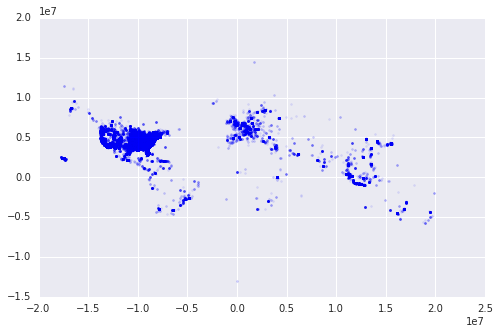

In [23]:
%matplotlib inline
import seaborn
from pylab import rcParams
rcParams['figure.figsize'] = 8, 5

plt.scatter(df.x, df.y,  s=4, color='b', alpha=0.1)